<h1>
    Light-Nesis Prototype
</h1>

<h2>Table of Contents</h2>
<ol>
    <li><a href="#data-loading">Load Data</a></li>
    <li><a href="#preprocessing">Preprocessing</a></li>
    <li>Model training</li>
    <li>Model evaluation</li>
</ol>

<h2 id="data-loading">Load Data</h2>

In [806]:
import pandas as pd
import os

In [807]:
def for_each(f, data, get_direction=False):
    for direction in ["Left", "None", "Right"]:
        if get_direction:
            f(data[direction], direction)
        else:
            f(data[direction])

In [808]:
def get_dataframes():
    dataframes = {"Left": [], "None": [], "Right": []}
    for sex in ["male", "female"]:
        participant = 1
        while True:
            participant_path = os.path.join("data", str(sex), str(participant))
            if not os.path.exists(participant_path):
                break
                
            for direction in dataframes:
                run = 1
                while True:
                    path = os.path.join(participant_path, str(direction), str(run) + ".csv")
                    if not os.path.exists(path):
                        break
                    df = pd.read_csv(path, delimiter="\t", names=[i for i in range(15)])
                    df[[1, 2, 3, 4]] /= 1000000 # Divide to convert from Brainflow uV to MNE V
                    dataframes[direction].append(df)
                    run += 1
            participant += 1
    return dataframes

In [809]:
dataframes = get_dataframes()

In [810]:
dataframes["Left"][0].head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,102.0,6.623363e-06,-0.000005,-5.624810e-06,0.000027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
1,102.0,-1.049042e-05,0.000003,-1.619377e-06,-0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
2,103.0,8.721447e-06,0.000008,7.397522e-06,0.000030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
3,103.0,-4.095190e-06,0.000006,-2.184850e-05,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
4,104.0,-1.520269e-05,0.000015,2.909268e-05,-0.000019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
5,104.0,8.078184e-06,0.000016,-2.842320e-07,0.000021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
6,105.0,8.231520e-06,0.000015,-2.815023e-05,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
7,105.0,-1.243143e-05,0.000013,-3.583198e-05,-0.000027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
8,106.0,-1.229679e-05,0.000015,-1.405080e-05,-0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
9,106.0,-3.291110e-07,0.000010,-1.532237e-05,0.000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0


In [811]:
dataframes["None"][0].head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,105.0,0.000003,0.000005,9.387150e-07,-1.383760e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
1,105.0,0.000027,0.000013,8.119323e-06,2.118279e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
2,106.0,-0.000005,0.000005,6.735560e-06,-8.287618e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
3,106.0,0.000044,0.000022,2.018424e-05,4.312479e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
4,107.0,0.000043,0.000020,2.530416e-05,4.444497e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
5,107.0,-0.000001,0.000009,9.510566e-06,-5.834240e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
6,108.0,0.000029,0.000020,1.903609e-05,3.243241e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
7,108.0,0.000059,0.000030,3.034181e-05,6.720974e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
8,109.0,0.000005,0.000007,4.701054e-06,1.202004e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0
9,109.0,0.000010,0.000008,8.175421e-06,1.231175e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660177e+09,0.0


In [812]:
dataframes["Right"][0].head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,104.0,0.000052,2.882341e-05,0.000036,0.000053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660178e+09,0.0
1,104.0,0.000020,1.491846e-05,0.000009,0.000019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660178e+09,0.0
2,105.0,-0.000013,1.701654e-06,0.000004,-0.000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660178e+09,0.0
3,105.0,0.000044,2.697964e-05,0.000032,0.000047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660178e+09,0.0
4,106.0,0.000039,2.645979e-05,0.000029,0.000046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660178e+09,0.0
5,106.0,-0.000009,2.240200e-06,0.000007,-0.000010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660178e+09,0.0
6,107.0,0.000029,2.105564e-05,0.000016,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660178e+09,0.0
7,107.0,0.000057,3.498676e-05,0.000043,0.000058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660178e+09,0.0
8,108.0,0.000005,6.032459e-06,0.000012,0.000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660178e+09,0.0
9,108.0,0.000012,1.147027e-05,0.000013,0.000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660178e+09,0.0


Creating RawArray with float64 data, n_channels=4, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


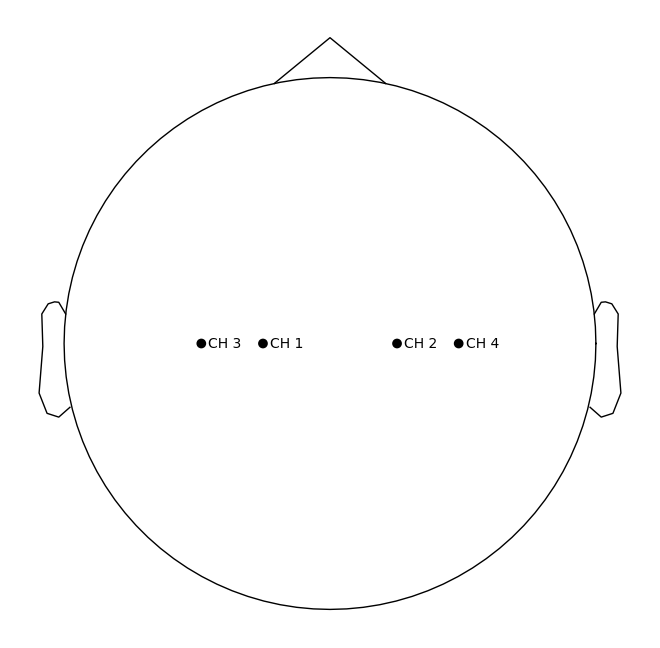

In [813]:
import mne
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds
import numpy as np

ch_pos = {
    "CH 1": [-0.03711946, -0., 0.08744796],
    "CH 2": [0.03711946, 0., 0.08744796],
    "CH 3": [-0.06833728, -0., 0.06599255],
    "CH 4": [0.06833728, 0., 0.06599255]
}

montage_params = {
    'ch_pos': ch_pos,
    'nasion': [5.27205792e-18,  8.60992398e-02, -4.01487349e-02],
    'coord_frame': 'mri',
    'lpa': [-0.08609924, -0., -0.04014873],
    'rpa': [0.08609924,  0., -0.04014873],
    'hpi': None,
    'hsp': None,
}

montage = mne.channels.make_dig_montage(**montage_params)

def get_raw(dataframes):
    raw_data = {"Left": [], "None": [], "Right": []}
    
    for direction in raw_data:
        for i in range(len(dataframes[direction])):
            eeg_channels = BoardShim.get_eeg_channels(BoardIds.GANGLION_BOARD.value)
            ch_types = ['eeg'] * len(eeg_channels)
            ch_names = ["CH 3", "CH 1", "CH 2", "CH 4"]
            sfreq = BoardShim.get_sampling_rate(BoardIds.GANGLION_BOARD.value)
            info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
            info["experimenter"] = "Ibrahim Khawar"
            raw = mne.io.RawArray(dataframes[direction][i][[1, 2, 3, 4]].T, info, verbose=False)
            raw.set_montage(montage)
            raw_data[direction].append(raw)
            
    return raw_data

montage.plot()
plt.show()

In [814]:
raw_data = get_raw(dataframes)

In [815]:
raw_data["Right"][16]

<RawArray | 4 x 5400 (27.0 s), ~181 kB, data loaded>

Effective window size : 10.240 (s)


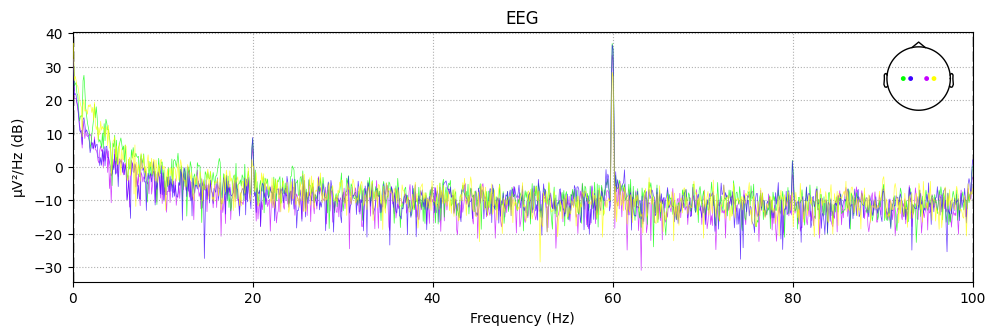

In [816]:
import matplotlib.pyplot as plt

raw_data["Right"][16].plot_psd()
plt.show()

In [817]:
from sklearn.model_selection import train_test_split

training_data, test_data = {}, {}

def split_data(data, direction):
    train, test = train_test_split(data, test_size=0.2, random_state=5)
    training_data[direction] = train
    test_data[direction] = test
    
for_each(split_data, raw_data, get_direction=True)

<h2 id="preprocessing">Preprocessing</h2>

<h3>Filter Unwanted Frequencies</h3>

In [818]:
def filter_data(data):
    for raw in data:
        raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge', verbose=False)
        raw.notch_filter(60., verbose=False)

util.for_each(filter_data, training_data)

Effective window size : 10.240 (s)


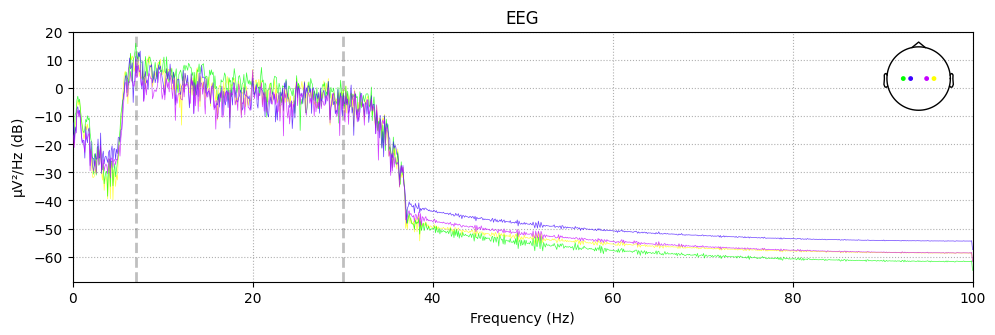

In [819]:
training_data["Right"][0].plot_psd()
plt.show()

Effective window size : 10.240 (s)


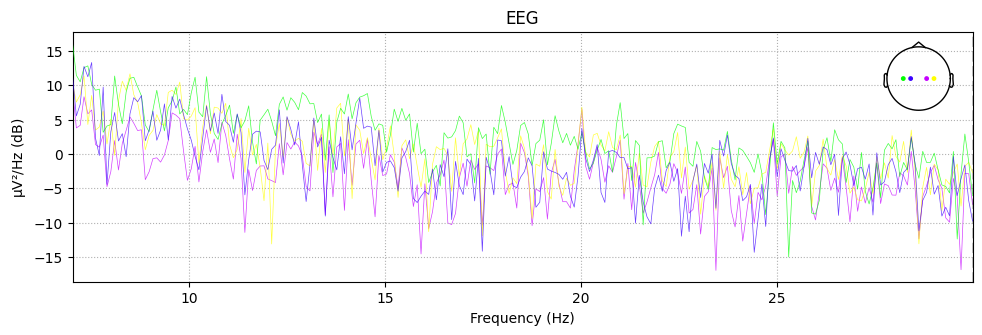

In [820]:
training_data["Right"][0].plot_psd(fmin=7, fmax=30) # Plot Mu-Beta waves (7Hz - 30Hz)
plt.show()

<h3>Trim the Data</h3>

Opening raw-browser...


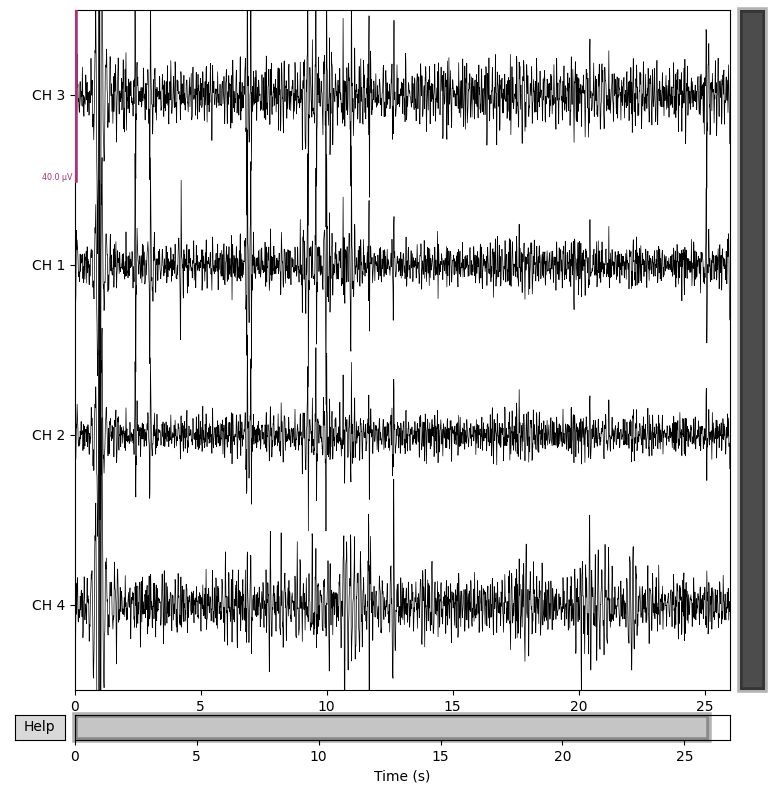

In [821]:
training_data["Right"][5].plot(duration=26)
plt.show()

In [822]:
def trim_raw(data):
    for raw in data:
        raw.crop(tmin=16, verbose=False) # Crop out data collected for 3... 2... 1...
        raw.filter(1, None, verbose=False) # Remove edge artifacts

for_each(trim_raw, training_data)

Opening raw-browser...


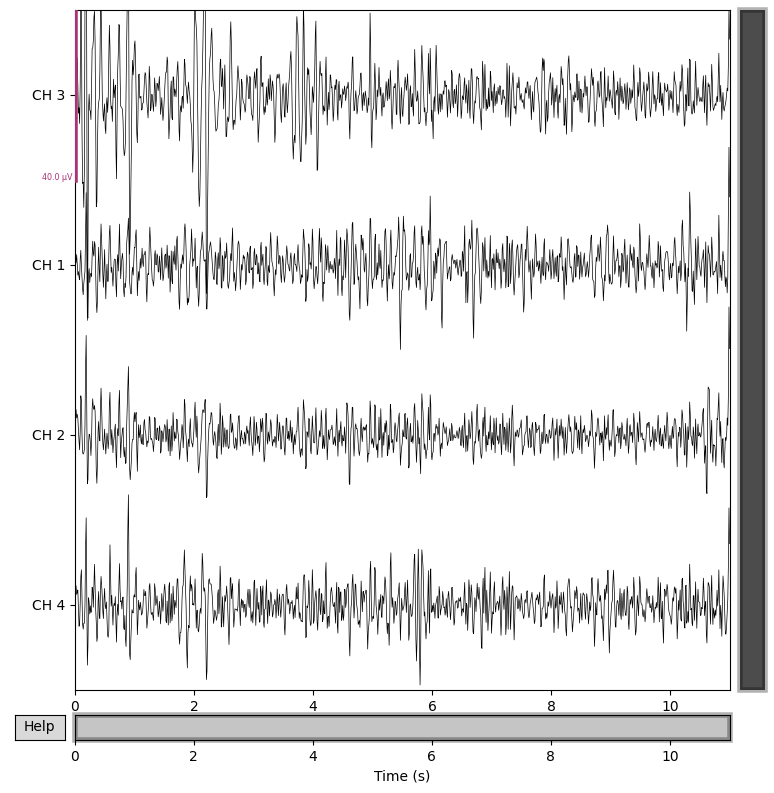

In [823]:
training_data["Right"][0].plot(duration=17)
plt.show()

<h3>Epoch Data</h3>